<a href="https://colab.research.google.com/github/STuric98/webtest/blob/main/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파일 압축 해제
!unzip /content/drive/MyDrive/archive.zip

In [ ]:
# 필요한 모듈 import하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import glob
import shutil

In [ ]:
# 파일 디렉토리 생성 
os.mkdir('/content/chest_xray/ex')

os.mkdir('/content/chest_xray/ex/train')
os.mkdir('/content/chest_xray/ex/test')

os.mkdir('/content/chest_xray/ex/train/NORMAL')
os.mkdir('/content/chest_xray/ex/train/PNEUMONIA')
os.mkdir('/content/chest_xray/ex/test/NORMAL')
os.mkdir('/content/chest_xray/ex/test/PNEUMONIA')

In [ ]:
#이미지 파일 복사 함수

def copy_images(source_folder, destination_folder, num_images):
    # 소스 폴더에서 이미지 파일 목록 가져오기
    image_files = [f for f in os.listdir(source_folder) if f.endswith('.jpeg') or f.endswith('.png')]

    # 이미지 파일을 지정된 개수만큼 다른 폴더로 복사
    count = 0
    for image_file in image_files:
        source_path = os.path.join(source_folder, image_file)
        destination_path = os.path.join(destination_folder, image_file)
        shutil.copy2(source_path, destination_path)
        count += 1

        if count >= num_images:
            break

    print(f'{count}장의 이미지 파일이 {destination_folder}로 복사되었습니다.')

# 변수 입력
source_folder = '/content/chest_xray/test/NORMAL'
destination_folder = '/content/chest_xray/ex/test'
num_images = 100

copy_images(source_folder, destination_folder, num_images)


100장의 이미지 파일이 /content/chest_xray/ex/test로 복사되었습니다.


In [ ]:
#해당 디렉토리 삭제
import shutil
shutil.rmtree('/content/chest_xray/sample/test/PNEUMONIA')

In [ ]:
# 파일로부터 영상을 읽어서 data에 저장하기
labels = ['PNEUMONIA', 'NORMAL']
img_size = 299
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/chest_xray/ex/train')
test = get_training_data('/content/chest_xray/ex/test')
#val = get_training_data('./chest_xray/val')

In [ ]:
print(train.shape) # 학습데이터
print(test.shape)  #테스트 데이터

(800, 2)
(200, 2)


In [ ]:
for feature, label in train:
  print(feature)
  print(label)

Text(0.5, 1.0, 'NORMAL')

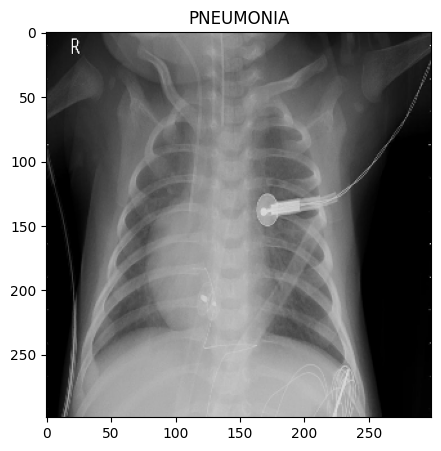

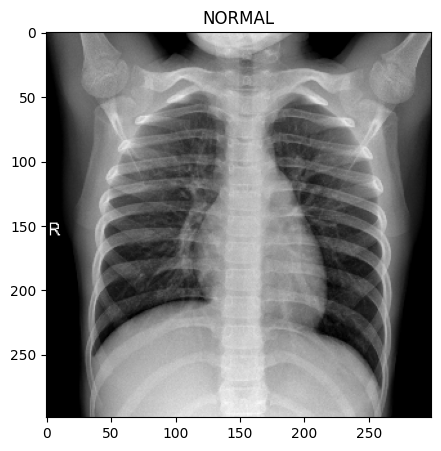

In [ ]:
#영상으로 보이기
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

#for feature, label in val:
#    x_val.append(feature)
#    y_val.append(label)

#데이터 정규화

In [ ]:
# 데이터를 Normalize 0~255  --->   0~1
x_train = np.array(x_train) / 255
#x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# 3채널 딥러닝위해 데이터 resize
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

#x_val = x_val.reshape(-1, img_size, img_size, 3)
#y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

#이미지 어그멘테이션

In [ ]:
# data augmentation하기

datagen = ImageDataGenerator(
컴퓨터비전_과제.ipynb
컴퓨터비전_과제.ipynb_노트북 별표 삭제됨
파일
..
파일을 드롭하면 세션 저장소에 업로드됩니다.
디스크
50.20 GB 사용 가능
[1]
24초
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
Mounted at /content/drive
[2]
# 파일 압축 해제
!unzip /content/drive/MyDrive/archive.zip
[3]
5초
# 필요한 모듈 import하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import glob
import shutil
[4]
0초
# 파일 디렉토리 생성 
os.mkdir('/content/chest_xray/ex')

os.mkdir('/content/chest_xray/ex/train')
os.mkdir('/content/chest_xray/ex/test')

os.mkdir('/content/chest_xray/ex/train/NORMAL')
os.mkdir('/content/chest_xray/ex/train/PNEUMONIA')
os.mkdir('/content/chest_xray/ex/test/NORMAL')
os.mkdir('/content/chest_xray/ex/test/PNEUMONIA')
[5]
0초
#이미지 파일 복사 함수

def copy_images(source_folder, destination_folder, num_images):
    # 소스 폴더에서 이미지 파일 목록 가져오기
    image_files = [f for f in os.listdir(source_folder) if f.endswith('.jpeg') or f.endswith('.png')]

    # 이미지 파일을 지정된 개수만큼 다른 폴더로 복사
    count = 0
    for image_file in image_files:
        source_path = os.path.join(source_folder, image_file)
        destination_path = os.path.join(destination_folder, image_file)
        shutil.copy2(source_path, destination_path)
        count += 1

        if count >= num_images:
            break

    print(f'{count\}장의 이미지 파일이 {destination_folder\}로 복사되었습니다.')

# 변수 입력
source_folder = '/content/chest_xray/test/NORMAL'
destination_folder = '/content/chest_xray/ex/test'
num_images = 100

copy_images(source_folder, destination_folder, num_images)

100장의 이미지 파일이 /content/chest_xray/ex/test로 복사되었습니다.
[ ]
#해당 디렉토리 삭제
import shutil
shutil.rmtree('/content/chest_xray/sample/test/PNEUMONIA')
[6]
0초
# 파일로부터 영상을 읽어서 data에 저장하기
labels = ['PNEUMONIA', 'NORMAL']
img_size = 299
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
[7]
0초
train = get_training_data('/content/chest_xray/ex/train')
test = get_training_data('/content/chest_xray/ex/test')
#val = get_training_data('./chest_xray/val')
[ ]
print(train.shape) # 학습데이터
print(test.shape)  #테스트 데이터
(800, 2)
(200, 2)
[ ]
for feature, label in train:
  print(feature)
  print(label)
[ ]
#영상으로 보이기
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

[ ]
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

#for feature, label in val:
#    x_val.append(feature)
#    y_val.append(label)
데이터 정규화
[ ]
# 데이터를 Normalize 0~255  --->   0~1
x_train = np.array(x_train) / 255
#x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
[ ]
# 3채널 딥러닝위해 데이터 resize
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

#x_val = x_val.reshape(-1, img_size, img_size, 3)
#y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)
이미지 어그멘테이션
[ ]
# data augmentation하기

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoo
InceptionV3 모델 미세조정
[ ]
#InceptionV3 모델 미세조정
from keras.applications import InceptionV3
inception = InceptionV3(weights='imagenet',input_shape=(299,299,3) , include_top=True)
for layer in inception.layers[:]:
  layer.trainable = True

base_inputs= inception.layers[0].input
base_outputs= inception.layers[-2].output
classifier=tf.keras.layers.Dense(2)(base_outputs)
new_model = keras.Model(inputs=base_inputs,outputs=classifier)

new_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=("accuracy"),
)
print(new_model.summary())
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
==================================================================================================
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                                 
                                                                                                  
 activation (Activation)        (None, 149, 149, 32  0           ['batch_normalization[0][0]']    
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 147, 147, 32  9216        ['activation[0][0]']             
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 147, 147, 32  96         ['conv2d_1[0][0]']               
 rmalization)                   )                                                                 
                                                                                                  
 activation_1 (Activation)      (None, 147, 147, 32  0           ['batch_normalization_1[0][0]']  
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 147, 147, 64  18432       ['activation_1[0][0]']           
                                )                                                                 
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 147, 147, 64  192        ['conv2d_2[0][0]']               
 rmalization)                   )                                                                 
                                                                                                  
 activation_2 (Activation)      (None, 147, 147, 64  0           ['batch_normalization_2[0][0]']  
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 73, 73, 64)   0           ['activation_2[0][0]']           
                                                                                                  
 conv2d_3 (Conv2D)              (None, 73, 73, 80)   5120        ['max_pooling2d[0][0]']          
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 73, 73, 80)  240         ['conv2d_3[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_3 (Activation)      (None, 73, 73, 80)   0           ['batch_normalization_3[0][0]']  
                                                                                                  
 conv2d_4 (Conv2D)              (None, 71, 71, 192)  138240      ['activation_3[0][0]']           
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 71, 71, 192)  576        ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_4 (Activation)      (None, 71, 71, 192)  0           ['batch_normalization_4[0][0]']  
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 35, 35, 192)  0          ['activation_4[0][0]']           
                                                                                                  
 conv2d_8 (Conv2D)              (None, 35, 35, 64)   12288       ['max_pooling2d_1[0][0]']        
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_8[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_8 (Activation)      (None, 35, 35, 64)   0           ['batch_normalization_8[0][0]']  
                                                                                                  
 conv2d_6 (Conv2D)              (None, 35, 35, 48)   9216        ['max_pooling2d_1[0][0]']        
                                                                                                  
 conv2d_9 (Conv2D)              (None, 35, 35, 96)   55296       ['activation_8[0][0]']           
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 35, 35, 48)  144         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 35, 35, 96)  288         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 35, 35, 48)   0           ['batch_normalization_6[0][0]']  
                                                                                                  
 activation_9 (Activation)      (None, 35, 35, 96)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 average_pooling2d (AveragePool  (None, 35, 35, 192)  0          ['max_pooling2d_1[0][0]']        
 ing2D)                                                                                           
                                                                                                  
 conv2d_5 (Conv2D)              (None, 35, 35, 64)   12288       ['max_pooling2d_1[0][0]']        
                                                                                                  
 conv2d_7 (Conv2D)              (None, 35, 35, 64)   76800       ['activation_6[0][0]']           
                                                                                                  
 conv2d_10 (Conv2D)             (None, 35, 35, 96)   82944       ['activation_9[0][0]']           
                                                                                                  
 conv2d_11 (Conv2D)             (None, 35, 35, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 35, 35, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 35, 35, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 35, 35, 96)   0           ['batch_normalization_10[0][0]'] 
                                                                                                  
 activation_11 (Activation)     (None, 35, 35, 32)   0           ['batch_normalization_11[0][0]'] 
                                                                                                  
 mixed0 (Concatenate)           (None, 35, 35, 256)  0           ['activation_5[0][0]',           
                                                                  'activation_7[0][0]',           
                                                                  'activation_10[0][0]',          
                                                                  'activation_11[0][0]']          
                                                                                                  
 conv2d_15 (Conv2D)             (None, 35, 35, 64)   16384       ['mixed0[0][0]']                 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 35, 35, 64)  192         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_15 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_15[0][0]'] 
                                                                                                  
 conv2d_13 (Conv2D)             (None, 35, 35, 48)   12288       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_16 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_15[0][0]']          
                                                                                                  
 batch_normalization_13 (BatchN  (None, 35, 35, 48)  144         ['conv2d_13[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_16 (BatchN  (None, 35, 35, 96)  288         ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_13 (Activation)     (None, 35, 35, 48)   0           ['batch_normalization_13[0][0]'] 
                                                                                                  
 activation_16 (Activation)     (None, 35, 35, 96)   0           ['batch_normalization_16[0][0]'] 
                                                                                                  
 average_pooling2d_1 (AveragePo  (None, 35, 35, 256)  0          ['mixed0[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_12 (Conv2D)             (None, 35, 35, 64)   16384       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_14 (Conv2D)             (None, 35, 35, 64)   76800       ['activation_13[0][0]']          
                                                                                                  
 conv2d_17 (Conv2D)             (None, 35, 35, 96)   82944       ['activation_16[0][0]']          
                                                                                                  
 conv2d_18 (Conv2D)             (None, 35, 35, 64)   16384       ['average_pooling2d_1[0][0]']    
                                                                                                  
 batch_normalization_12 (BatchN  (None, 35, 35, 64)  192         ['conv2d_12[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_14 (BatchN  (None, 35, 35, 64)  192         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_17 (BatchN  (None, 35, 35, 96)  288         ['conv2d_17[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_18 (BatchN  (None, 35, 35, 64)  192         ['conv2d_18[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_12 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_12[0][0]'] 
                                                                                                  
 activation_14 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_14[0][0]'] 
                                                                                                  
 activation_17 (Activation)     (None, 35, 35, 96)   0           ['batch_normalization_17[0][0]'] 
                                                                                                  
 activation_18 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 mixed1 (Concatenate)           (None, 35, 35, 288)  0           ['activation_12[0][0]',          
                                                                  'activation_14[0][0]',          
                                                                  'activation_17[0][0]',          
                                                                  'activation_18[0][0]']          
                                                                                                  
 conv2d_22 (Conv2D)             (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 35, 35, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 35, 35, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 35, 35, 48)   0           ['batch_normalization_20[0][0]'] 
                                                                                                  
 activation_23 (Activation)     (None, 35, 35, 96)   0           ['batch_normalization_23[0][0]'] 
                                                                                                  
 average_pooling2d_2 (AveragePo  (None, 35, 35, 288)  0          ['mixed1[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_19 (Conv2D)             (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 35, 35, 64)   76800       ['activation_20[0][0]']          
                                                                                                  
 conv2d_24 (Conv2D)             (None, 35, 35, 96)   82944       ['activation_23[0][0]']          
                                                                                                  
 conv2d_25 (Conv2D)             (None, 35, 35, 64)   18432       ['average_pooling2d_2[0][0]']    
                                                                                                  
 batch_normalization_19 (BatchN  (None, 35, 35, 64)  192         ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_21 (BatchN  (None, 35, 35, 64)  192         ['conv2d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_24 (BatchN  (None, 35, 35, 96)  288         ['conv2d_24[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_25 (BatchN  (None, 35, 35, 64)  192         ['conv2d_25[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activation_21 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 activation_24 (Activation)     (None, 35, 35, 96)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_25 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_25[0][0]'] 
                                                                                                  
 mixed2 (Concatenate)           (None, 35, 35, 288)  0           ['activation_19[0][0]',          
                                                                  'activation_21[0][0]',          
                                                                  'activation_24[0][0]',          
                                                                  'activation_25[0][0]']          
                                                                                                  
 conv2d_27 (Conv2D)             (None, 35, 35, 64)   18432       ['mixed2[0][0]']                 
                                                                                                  
 batch_normalization_27 (BatchN  (None, 35, 35, 64)  192         ['conv2d_27[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_27 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_27[0][0]'] 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_27[0][0]']          
                                                                                                  
 batch_normalization_28 (BatchN  (None, 35, 35, 96)  288         ['conv2d_28[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_28 (Activation)     (None, 35, 35, 96)   0           ['batch_normalization_28[0][0]'] 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 17, 17, 384)  995328      ['mixed2[0][0]']                 
                                                                                                  
 conv2d_29 (Conv2D)             (None, 17, 17, 96)   82944       ['activation_28[0][0]']          
                                                                                                  
 batch_normalization_26 (BatchN  (None, 17, 17, 384)  1152       ['conv2d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_29 (BatchN  (None, 17, 17, 96)  288         ['conv2d_29[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_26 (Activation)     (None, 17, 17, 384)  0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 17, 17, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 17, 17, 128)  114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_35 (BatchN  (None, 17, 17, 128)  384        ['conv2d_35[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_35 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_35[0][0]'] 
                                                                                                  
 conv2d_31 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 17, 17, 128)  114688      ['activation_35[0][0]']          
                                                                                                  
 batch_normalization_31 (BatchN  (None, 17, 17, 128)  384        ['conv2d_31[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_36 (BatchN  (None, 17, 17, 128)  384        ['conv2d_36[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_31 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_31[0][0]'] 
                                                                                                  
 activation_36 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_36[0][0]'] 
                                                                                                  
 conv2d_32 (Conv2D)             (None, 17, 17, 128)  114688      ['activation_31[0][0]']          
                                                                                                  
 conv2d_37 (Conv2D)             (None, 17, 17, 128)  114688      ['activation_36[0][0]']          
                                                                                                  
 batch_normalization_32 (BatchN  (None, 17, 17, 128)  384        ['conv2d_32[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_37 (BatchN  (None, 17, 17, 128)  384        ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_32 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_32[0][0]'] 
                                                                                                  
 activation_37 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 average_pooling2d_3 (AveragePo  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_30 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_33 (Conv2D)             (None, 17, 17, 192)  172032      ['activation_32[0][0]']          
                                                                                                  
 conv2d_38 (Conv2D)             (None, 17, 17, 192)  172032      ['activation_37[0][0]']          
                                                                                                  
 conv2d_39 (Conv2D)             (None, 17, 17, 192)  147456      ['average_pooling2d_3[0][0]']    
                                                                                                  
 batch_normalization_30 (BatchN  (None, 17, 17, 192)  576        ['conv2d_30[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_33 (BatchN  (None, 17, 17, 192)  576        ['conv2d_33[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_38 (BatchN  (None, 17, 17, 192)  576        ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_39 (BatchN  (None, 17, 17, 192)  576        ['conv2d_39[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_30 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_30[0][0]'] 
                                                                                                  
 activation_33 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_33[0][0]'] 
                                                                                                  
 activation_38 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_38[0][0]'] 
                                                                                                  
 activation_39 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_39[0][0]'] 
                                                                                                  
 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_30[0][0]',          
                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 17, 17, 160)  480        ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_46 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_45[0][0]']          
                                                                                                  
 batch_normalization_41 (BatchN  (None, 17, 17, 160)  480        ['conv2d_41[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_46 (BatchN  (None, 17, 17, 160)  480        ['conv2d_46[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_41 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_41[0][0]'] 
                                                                                                  
 activation_46 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_46[0][0]'] 
                                                                                                  
 conv2d_42 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_41[0][0]']          
                                                                                                  
 conv2d_47 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_46[0][0]']          
                                                                                                  
 batch_normalization_42 (BatchN  (None, 17, 17, 160)  480        ['conv2d_42[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_47 (BatchN  (None, 17, 17, 160)  480        ['conv2d_47[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_42 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_42[0][0]'] 
                                                                                                  
 activation_47 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_47[0][0]'] 
                                                                                                  
 average_pooling2d_4 (AveragePo  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_40 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_43 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_42[0][0]']          
                                                                                                  
 conv2d_48 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_47[0][0]']          
                                                                                                  
 conv2d_49 (Conv2D)             (None, 17, 17, 192)  147456      ['average_pooling2d_4[0][0]']    
                                                                                                  
 batch_normalization_40 (BatchN  (None, 17, 17, 192)  576        ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_43 (BatchN  (None, 17, 17, 192)  576        ['conv2d_43[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_48 (BatchN  (None, 17, 17, 192)  576        ['conv2d_48[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_49 (BatchN  (None, 17, 17, 192)  576        ['conv2d_49[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_40 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 activation_43 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_43[0][0]'] 
                                                                                                  
 activation_48 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 activation_49 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_49[0][0]'] 
                                                                                                  
 mixed5 (Concatenate)           (None, 17, 17, 768)  0           ['activation_40[0][0]',          
                                                                  'activation_43[0][0]',          
                                                                  'activation_48[0][0]',          
                                                                  'activation_49[0][0]']          
                                                                                                  
 conv2d_54 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 17, 17, 160)  480        ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 17, 17, 160)  480        ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 17, 17, 160)  480        ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_51 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_51[0][0]'] 
                                                                                                  
 activation_56 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_56[0][0]'] 
                                                                                                  
 conv2d_52 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_51[0][0]']          
                                                                                                  
 conv2d_57 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_56[0][0]']          
                                                                                                  
 batch_normalization_52 (BatchN  (None, 17, 17, 160)  480        ['conv2d_52[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_57 (BatchN  (None, 17, 17, 160)  480        ['conv2d_57[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_52 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_52[0][0]'] 
                                                                                                  
 activation_57 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_57[0][0]'] 
                                                                                                  
 average_pooling2d_5 (AveragePo  (None, 17, 17, 768)  0          ['mixed5[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_50 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_52[0][0]']          
                                                                                                  
 conv2d_58 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_57[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 17, 17, 192)  147456      ['average_pooling2d_5[0][0]']    
                                                                                                  
 batch_normalization_50 (BatchN  (None, 17, 17, 192)  576        ['conv2d_50[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_53 (BatchN  (None, 17, 17, 192)  576        ['conv2d_53[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_58 (BatchN  (None, 17, 17, 192)  576        ['conv2d_58[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_59 (BatchN  (None, 17, 17, 192)  576        ['conv2d_59[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_50 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_50[0][0]'] 
                                                                                                  
 activation_53 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_53[0][0]'] 
                                                                                                  
 activation_58 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 activation_59 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 mixed6 (Concatenate)           (None, 17, 17, 768)  0           ['activation_50[0][0]',          
                                                                  'activation_53[0][0]',          
                                                                  'activation_58[0][0]',          
                                                                  'activation_59[0][0]']          
                                                                                                  
 conv2d_64 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 batch_normalization_64 (BatchN  (None, 17, 17, 192)  576        ['conv2d_64[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_64 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_64[0][0]'] 
                                                                                                  
 conv2d_65 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 17, 17, 192)  576        ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 17, 17, 192)  576        ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_61[0][0]'] 
                                                                                                  
 activation_66 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_66[0][0]'] 
                                                                                                  
 conv2d_62 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_61[0][0]']          
                                                                                                  
 conv2d_67 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_66[0][0]']          
                                                                                                  
 batch_normalization_62 (BatchN  (None, 17, 17, 192)  576        ['conv2d_62[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_67 (BatchN  (None, 17, 17, 192)  576        ['conv2d_67[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_62 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_62[0][0]'] 
                                                                                                  
 activation_67 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_67[0][0]'] 
                                                                                                  
 average_pooling2d_6 (AveragePo  (None, 17, 17, 768)  0          ['mixed6[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_60 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_63 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_62[0][0]']          
                                                                                                  
 conv2d_68 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_67[0][0]']          
                                                                                                  
 conv2d_69 (Conv2D)             (None, 17, 17, 192)  147456      ['average_pooling2d_6[0][0]']    
                                                                                                  
 batch_normalization_60 (BatchN  (None, 17, 17, 192)  576        ['conv2d_60[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_63 (BatchN  (None, 17, 17, 192)  576        ['conv2d_63[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_68 (BatchN  (None, 17, 17, 192)  576        ['conv2d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_69 (BatchN  (None, 17, 17, 192)  576        ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_60 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_60[0][0]'] 
                                                                                                  
 activation_63 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_63[0][0]'] 
                                                                                                  
 activation_68 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_68[0][0]'] 
                                                                                                  
 activation_69 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 mixed7 (Concatenate)           (None, 17, 17, 768)  0           ['activation_60[0][0]',          
                                                                  'activation_63[0][0]',          
                                                                  'activation_68[0][0]',          
                                                                  'activation_69[0][0]']          
                                                                                                  
 conv2d_72 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 batch_normalization_72 (BatchN  (None, 17, 17, 192)  576        ['conv2d_72[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_72 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_72[0][0]'] 
                                                                                                  
 conv2d_73 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_72[0][0]']          
                                                                                                  
 batch_normalization_73 (BatchN  (None, 17, 17, 192)  576        ['conv2d_73[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_73 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 8, 8, 320)    552960      ['activation_70[0][0]']          
                                                                                                  
 conv2d_75 (Conv2D)             (None, 8, 8, 192)    331776      ['activation_74[0][0]']          
                                                                                                  
 batch_normalization_71 (BatchN  (None, 8, 8, 320)   960         ['conv2d_71[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_75 (BatchN  (None, 8, 8, 192)   576         ['conv2d_75[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_71 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_71[0][0]'] 
                                                                                                  
 activation_75 (Activation)     (None, 8, 8, 192)    0           ['batch_normalization_75[0][0]'] 
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 8, 8, 768)   0           ['mixed7[0][0]']                 
                                                                                                  
 mixed8 (Concatenate)           (None, 8, 8, 1280)   0           ['activation_71[0][0]',          
                                                                  'activation_75[0][0]',          
                                                                  'max_pooling2d_3[0][0]']        
                                                                                                  
 conv2d_80 (Conv2D)             (None, 8, 8, 448)    573440      ['mixed8[0][0]']                 
                                                                                                  
 batch_normalization_80 (BatchN  (None, 8, 8, 448)   1344        ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_80 (Activation)     (None, 8, 8, 448)    0           ['batch_normalization_80[0][0]'] 
                                                                                                  
 conv2d_77 (Conv2D)             (None, 8, 8, 384)    491520      ['mixed8[0][0]']                 
                                                                                                  
 conv2d_81 (Conv2D)             (None, 8, 8, 384)    1548288     ['activation_80[0][0]']          
                                                                                                  
 batch_normalization_77 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_81 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_81[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 activation_81 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_81[0][0]'] 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_77[0][0]']          
                                                                                                  
 conv2d_79 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_77[0][0]']          
                                                                                                  
 conv2d_82 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_81[0][0]']          
                                                                                                  
 conv2d_83 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_81[0][0]']          
                                                                                                  
 average_pooling2d_7 (AveragePo  (None, 8, 8, 1280)  0           ['mixed8[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_76 (Conv2D)             (None, 8, 8, 320)    409600      ['mixed8[0][0]']                 
                                                                                                  
 batch_normalization_78 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_78[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_79 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_79[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_82 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_82[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_83 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_83[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_84 (Conv2D)             (None, 8, 8, 192)    245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 8, 8, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 8, 8, 768)    0           ['activation_78[0][0]',          
                                                                  'activation_79[0][0]']          
                                                                                                  
 concatenate (Concatenate)      (None, 8, 8, 768)    0           ['activation_82[0][0]',          
                                                                  'activation_83[0][0]']          
                                                                                                  
 activation_84 (Activation)     (None, 8, 8, 192)    0           ['batch_normalization_84[0][0]'] 
                                                                                                  
 mixed9 (Concatenate)           (None, 8, 8, 2048)   0           ['activation_76[0][0]',          
                                                                  'mixed9_0[0][0]',               
                                                                  'concatenate[0][0]',            
                                                                  'activation_84[0][0]']          
                                                                                                  
 conv2d_89 (Conv2D)             (None, 8, 8, 448)    917504      ['mixed9[0][0]']                 
                                                                                                  
 batch_normalization_89 (BatchN  (None, 8, 8, 448)   1344        ['conv2d_89[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_89 (Activation)     (None, 8, 8, 448)    0           ['batch_normalization_89[0][0]'] 
                                                                                                  
 conv2d_86 (Conv2D)             (None, 8, 8, 384)    786432      ['mixed9[0][0]']                 
                                                                                                  
 conv2d_90 (Conv2D)             (None, 8, 8, 384)    1548288     ['activation_89[0][0]']          
                                                                                                  
 batch_normalization_86 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_90 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_90[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_90 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_90[0][0]'] 
                                                                                                  
 conv2d_87 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_86[0][0]']          
                                                                                                  
 conv2d_88 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_86[0][0]']          
                                                                                                  
 conv2d_91 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_90[0][0]']          
                                                                                                  
 conv2d_92 (Conv2D)             (None, 8, 8, 384)    442368      ['activation_90[0][0]']          
                                                                                                  
 average_pooling2d_8 (AveragePo  (None, 8, 8, 2048)  0           ['mixed9[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_85 (Conv2D)             (None, 8, 8, 320)    655360      ['mixed9[0][0]']                 
                                                                                                  
 batch_normalization_87 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_87[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_88 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_88[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_91 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_91[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_92 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_92[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_93 (Conv2D)             (None, 8, 8, 192)    393216      ['average_pooling2d_8[0][0]']    
                                                                                                  
 batch_normalization_85 (BatchN  (None, 8, 8, 320)   960         ['conv2d_85[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_87 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 activation_88 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 8, 8, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 8, 8, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 8, 8, 192)    0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 mixed10 (Concatenate)          (None, 8, 8, 2048)   0           ['activation_85[0][0]',          
                                                                  'mixed9_1[0][0]',               
                                                                  'concatenate_1[0][0]',          
                                                                  'activation_93[0][0]']          
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 2048)        0           ['mixed10[0][0]']                
 2D)                                                                                              
                                                                                                  
 dense (Dense)                  (None, 2)            4098        ['avg_pool[0][0]']               
                                                                                                  
==================================================================================================
Total params: 21,806,882
Trainable params: 21,772,450
Non-trainable params: 34,432
__________________________________________________________________________________________________
None
모델 학습
[ ]
#모델 학습
history = new_model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12)
Epoch 1/15
25/25 [==============================] - 73s 739ms/step - loss: 0.4092 - accuracy: 0.8475
Epoch 2/15
25/25 [==============================] - 20s 795ms/step - loss: 0.2630 - accuracy: 0.8938
Epoch 3/15
25/25 [==============================] - 19s 744ms/step - loss: 0.1927 - accuracy: 0.9287
Epoch 4/15
25/25 [==============================] - 20s 788ms/step - loss: 0.1338 - accuracy: 0.9463
Epoch 5/15
25/25 [==============================] - 19s 749ms/step - loss: 0.0801 - accuracy: 0.9675
Epoch 6/15
25/25 [==============================] - 19s 751ms/step - loss: 0.1188 - accuracy: 0.9575
Epoch 7/15
25/25 [==============================] - 20s 783ms/step - loss: 0.0772 - accuracy: 0.9700
Epoch 8/15
25/25 [==============================] - 19s 745ms/step - loss: 0.1206 - accuracy: 0.9550
Epoch 9/15
25/25 [==============================] - 20s 804ms/step - loss: 0.1027 - accuracy: 0.9663
Epoch 10/15
25/25 [==============================] - 19s 754ms/step - loss: 0.0776 - accuracy: 0.9725
Epoch 11/15
25/25 [==============================] - 20s 784ms/step - loss: 0.0635 - accuracy: 0.9750
Epoch 12/15
25/25 [==============================] - 19s 749ms/step - loss: 0.0453 - accuracy: 0.9875
Epoch 13/15
25/25 [==============================] - 20s 807ms/step - loss: 0.0587 - accuracy: 0.9800
Epoch 14/15
25/25 [==============================] - 20s 766ms/step - loss: 0.0219 - accuracy: 0.9937
Epoch 15/15
25/25 [==============================] - 19s 751ms/step - loss: 0.0661 - accuracy: 0.9800
성능 평가
[ ]
#평가
print("Loss of the model is - " , new_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , new_model.evaluate(x_test,y_test)[1]*100 , "%")
7/7 [==============================] - 3s 314ms/step - loss: 0.4164 - accuracy: 0.9100
Loss of the model is -  0.4163791239261627
7/7 [==============================] - 1s 109ms/step - loss: 0.4164 - accuracy: 0.9100
Accuracy of the model is -  91.00000262260437 %
모델 정확도 및 손실값 그래프
[ ]
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
#ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
#ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()


        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# InceptionV3 모델 미세조정

In [ ]:
#InceptionV3 모델 미세조정
from keras.applications import InceptionV3
inception = InceptionV3(weights='imagenet',input_shape=(299,299,3) , include_top=True)
for layer in inception.layers[:]:
  layer.trainable = True

base_inputs= inception.layers[0].input
base_outputs= inception.layers[-2].output
classifier=tf.keras.layers.Dense(2)(base_outputs)
new_model = keras.Model(inputs=base_inputs,outputs=classifier)

new_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=("accuracy"),
)
print(new_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

#모델 학습

In [ ]:
#모델 학습
history = new_model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 15)

Epoch 1/15
25/25 [==============================] - 73s 739ms/step - loss: 0.4092 - accuracy: 0.8475
Epoch 2/15
25/25 [==============================] - 20s 795ms/step - loss: 0.2630 - accuracy: 0.8938
Epoch 3/15
25/25 [==============================] - 19s 744ms/step - loss: 0.1927 - accuracy: 0.9287
Epoch 4/15
25/25 [==============================] - 20s 788ms/step - loss: 0.1338 - accuracy: 0.9463
Epoch 5/15
25/25 [==============================] - 19s 749ms/step - loss: 0.0801 - accuracy: 0.9675
Epoch 6/15
25/25 [==============================] - 19s 751ms/step - loss: 0.1188 - accuracy: 0.9575
Epoch 7/15
25/25 [==============================] - 20s 783ms/step - loss: 0.0772 - accuracy: 0.9700
Epoch 8/15
25/25 [==============================] - 19s 745ms/step - loss: 0.1206 - accuracy: 0.9550
Epoch 9/15
25/25 [==============================] - 20s 804ms/step - loss: 0.1027 - accuracy: 0.9663
Epoch 10/15
25/25 [==============================] - 19s 754ms/step - loss: 0.0776 - accura

#성능 평가

In [ ]:
#평가
print("Loss of the model is - " , new_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , new_model.evaluate(x_test,y_test)[1]*100 , "%")

7/7 [==============================] - 3s 314ms/step - loss: 0.4164 - accuracy: 0.9100
Loss of the model is -  0.4163791239261627
7/7 [==============================] - 1s 109ms/step - loss: 0.4164 - accuracy: 0.9100
Accuracy of the model is -  91.00000262260437 %
